In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [191]:
df = pd.read_csv("sample_submission.csv")

In [192]:
# df.loc[:, df.columns[(((df.corr()**2)["target"]) < 0.0005)]] = 0# & (((df.corr()**2)["target"]) != 1)]

In [193]:
# df.to_csv("submission.csv", index=False)

In [194]:
df["target"] = df["target"].apply(lambda x: x if x < 18 else np.nan)

In [195]:
# Removing values that are from (almost) impossible ranges
df.loc[:, df.columns.str.contains("^O2")] = df.loc[:, df.columns.str.contains("^O2")].apply(lambda x: x[(x > 1) & (x < 18)])

In [196]:
df.loc[:, df.columns.str.contains("^O2") | (df.columns == "target")].corr()**2

,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7
target,1.000000,0.434769,0.232975,0.006485,0.000735,0.000255,0.014928,0.006983
O2_1,0.434769,1.000000,0.272437,0.008708,0.003310,0.000273,0.005553,0.002794
O2_2,0.232975,0.272437,1.000000,0.000370,0.001518,0.005469,0.011236,0.004755
O2_3,0.006485,0.008708,0.000370,1.000000,0.059757,0.027294,0.049189,0.012786
O2_4,0.000735,0.003310,0.001518,0.059757,1.000000,0.029395,0.002028,0.000203
O2_5,0.000255,0.000273,0.005469,0.027294,0.029395,1.000000,0.000055,0.013683
O2_6,0.014928,0.005553,0.011236,0.049189,0.002028,0.000055,1.000000,0.046861
O2_7,0.006983,0.002794,0.004755,0.012786,0.000203,0.013683,0.046861,1.000000


<Axes: >

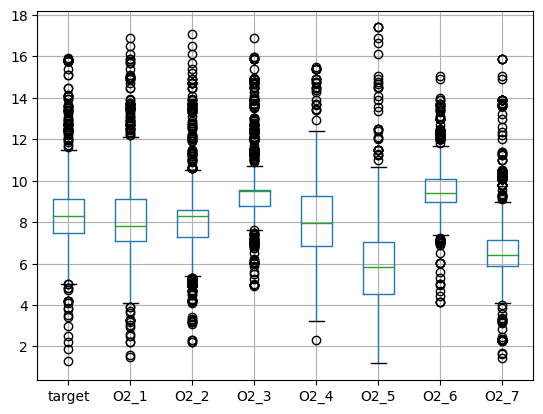

In [197]:
df.loc[:, df.columns.str.contains("^O2") | (df.columns == "target")].boxplot()

<Axes: >

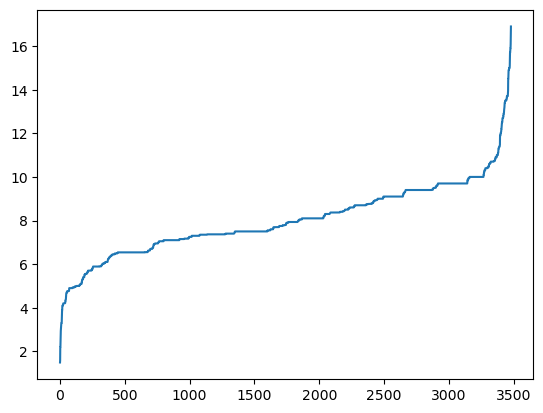

In [198]:
df["O2_1"].sort_values().reset_index(drop=True).plot()

In [199]:
for_plot_slice = df.loc[:, df.columns.str.contains("^O2") | (df.columns == "target")]

In [200]:
df.loc[:, df.columns.str.contains("^O2")] = df.loc[:, df.columns.str.contains("^O2")].groupby(df.columns[df.columns.str.contains("^O2")], axis=1, group_keys=False).apply(lambda x: x.fillna(x.mean()))#.to_csv("submission.csv", index=False)

In [203]:
df.dropna().to_csv("submission.csv", index=False)

In [204]:
df.loc[:, df.columns.str.contains("^O2") | (df.columns == "target")].corr()**2

,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7
target,1.000000,0.430622,0.229337,0.006485,0.000735,0.000241,0.014916,0.006981
O2_1,0.430622,1.000000,0.267791,0.008580,0.003287,0.000258,0.005523,0.002781
O2_2,0.229337,0.267791,1.000000,0.000351,0.001425,0.004961,0.010857,0.004484
O2_3,0.006485,0.008580,0.000351,1.000000,0.059558,0.025955,0.049139,0.012769
O2_4,0.000735,0.003287,0.001425,0.059558,1.000000,0.028744,0.002022,0.000203
O2_5,0.000241,0.000258,0.004961,0.025955,0.028744,1.000000,0.000053,0.013374
O2_6,0.014916,0.005523,0.010857,0.049139,0.002022,0.000053,1.000000,0.046795
O2_7,0.006981,0.002781,0.004484,0.012769,0.000203,0.013374,0.046795,1.000000
